Загрузка библиотек

In [109]:
import numpy as np
import pandas as pd
import random

In [134]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [255]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

In [264]:
def evaluate_preds(train_true_values, train_pred_values, val_true_values, val_pred_values):
    
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Valid R2:\t" + str(round(r2(val_true_values, val_pred_values), 3)))
    
    plt.figure(figsize=(20,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=val_pred_values, y=val_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')
    plt.show()

Загрузка данных

In [23]:
train_df = pd.read_csv('/Users/dorki/train.csv').set_index('Id')
test_df = pd.read_csv('/Users/dorki/test.csv').set_index('Id')

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [22]:
train_df.tail(10)
print(train_df.shape)

(10000, 19)


In [25]:
test_df.tail(10)
print(test_df.shape)

(5000, 18)


In [26]:
train_df.shape[1]-1 == test_df.shape[1]

True

In [29]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01
Social_1,10000.0,24.687000,17.532614,0.000000,6.000000,25.000000,36.000000,7.400000e+01


In [31]:
train_df['DistrictId'] = train_df['DistrictId'].astype(str)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  object 
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Pri

Анализ данных

1.Целевая переменная Price

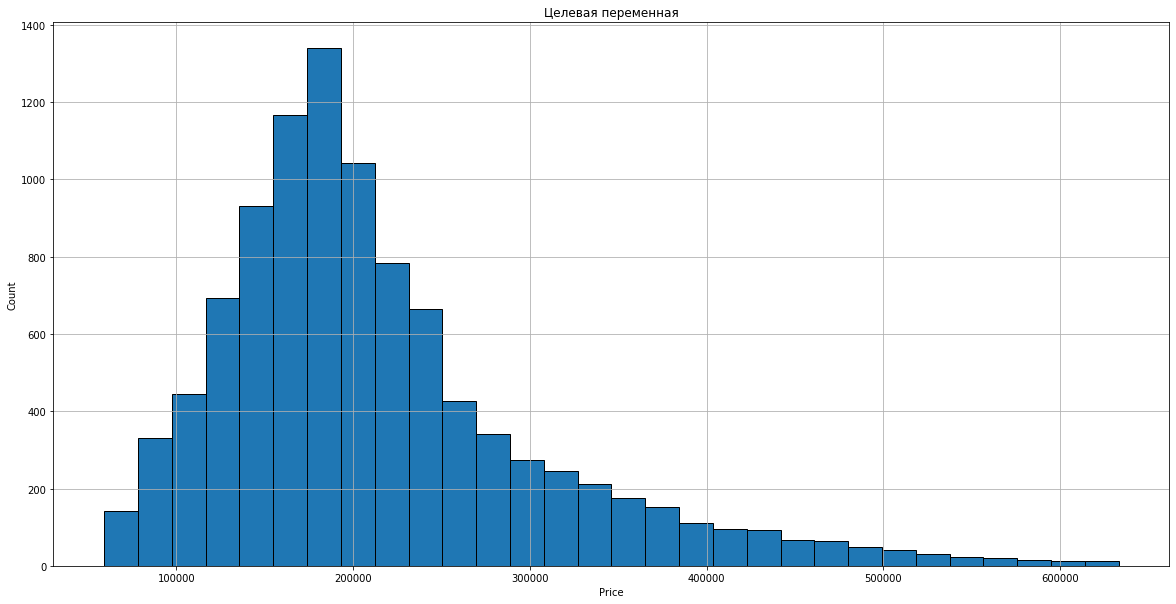

In [39]:
plt.figure(figsize = (20, 10))

train_df['Price'].hist(bins=30, edgecolor = 'black')
plt.ylabel('Count')
plt.xlabel('Price')
plt.title('Целевая переменная')
plt.show()

Количественные переменные

In [40]:
train_df.describe(include=['O']).T

,count,unique,top,freq
DistrictId,10000,205,27,851
Ecology_2,10000,2,B,9903
Ecology_3,10000,2,B,9725
Shops_2,10000,2,B,9175


Обработка выбросов

Переменная Rooms

In [50]:
train_df['Rooms'].value_counts()

2.0      3880
1.0      3705
3.0      2235
4.0       150
5.0        18
False      11
6.0         1
Name: Rooms, dtype: int64

In [54]:
train_df.loc[train_df['Rooms'].isin([False]), 'Rooms'] = train_df['Rooms'].median()

In [56]:
train_df['Rooms'].value_counts()

2.0    3891
1.0    3705
3.0    2235
4.0     150
5.0      18
6.0       1
Name: Rooms, dtype: int64

Переменная Square

In [58]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01
Social_1,10000.0,24.687000,17.532614,0.000000,6.000000,25.000000,36.000000,7.400000e+01
Social_2,10000.0,5352.157400,4006.799803,168.000000,1564.000000,5285.000000,7227.000000,1.908300e+04
Social_3,10000.0,8.039200,23.831875,0.000000,0.000000,2.000000,5.000000,1.410000e+02


In [63]:
train_df.loc[train_df['Square'] < 25, 'Square'] = train_df['Square'].median()

In [65]:
train_df.describe()

,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,56.444793,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,20.912525,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,25.410513,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,41.860646,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,52.513715,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [66]:
train_df['Square'].isnull().sum()

0

Переменная LifeSquare

In [67]:
train_df['LifeSquare'].isnull().sum()

2113

In [73]:
train_df.loc[train_df['LifeSquare'].isnull(), 'LifeSquare'] = train_df['LifeSquare'].median()

In [74]:
train_df['LifeSquare'].isnull().sum()

0

In [75]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  object 
 1   Rooms          10000 non-null  object 
 2   Square         10000 non-null  float64
 3   LifeSquare     10000 non-null  float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Pri

In [76]:
train_df[['LifeSquare']]

,LifeSquare
Id,
14038,29.442751
15053,40.049543
4765,29.197612
5809,52.731512
10783,23.776169
...,...
77,30.476203
6159,20.539216
5123,32.781260


In [78]:
train_df[[ 'LifeSquare','Square','KitchenSquare']].describe()

,LifeSquare,Square,KitchenSquare
count,10000.000000,10000.000000,10000.000000
mean,36.266040,56.444793,6.273300
std,76.609981,20.912525,28.560917
min,0.370619,25.410513,0.000000
25%,25.527399,41.860646,1.000000
50%,32.781260,52.513715,6.000000
75%,41.427234,65.900625,9.000000
max,7480.592129,641.065193,2014.000000


In [79]:
train_df.loc[train_df['LifeSquare'] < 15, 'LifeSquare'] = train_df['LifeSquare'].median()

In [83]:
train_df[['LifeSquare','Square']].describe()

,LifeSquare,Square
count,10000.000000,10000.000000
mean,34.706514,56.444793
std,13.111162,20.912525
min,15.001234,25.410513
25%,27.964876,41.860646
50%,32.781260,52.513715
75%,37.732537,65.900625
max,233.949309,641.065193


In [82]:
train_df.loc[(train_df['LifeSquare'] > 600) | (train_df['LifeSquare'] > train_df['Square']),'LifeSquare'] = train_df['LifeSquare'].median()

Переменая KitchenSquare


In [84]:
train_df['KitchenSquare'].isnull().sum()

0

In [85]:
train_df[['KitchenSquare']]

,KitchenSquare
Id,
14038,6.0
15053,8.0
4765,0.0
5809,9.0
10783,7.0
...,...
77,5.0
6159,9.0
5123,1.0


In [86]:
train_df.loc[train_df['KitchenSquare'] < 4, 'KitchenSquare'] = train_df['KitchenSquare'].median()

In [87]:
train_df[['KitchenSquare','Square']].describe()

,KitchenSquare,Square
count,10000.00000,10000.000000
mean,7.92970,56.444793
std,28.34414,20.912525
min,4.00000,25.410513
25%,6.00000,41.860646
50%,6.00000,52.513715
75%,9.00000,65.900625
max,2014.00000,641.065193


In [88]:
train_df.loc[(train_df['KitchenSquare'] > 400) | (train_df['KitchenSquare'] > train_df['Square']),'KitchenSquare'] = train_df['KitchenSquare'].median()

In [89]:
train_df[['KitchenSquare','Square']].describe()

,KitchenSquare,Square
count,10000.000000,10000.000000
mean,7.518000,56.444793
std,3.838952,20.912525
min,4.000000,25.410513
25%,6.000000,41.860646
50%,6.000000,52.513715
75%,9.000000,65.900625
max,123.000000,641.065193


Переменные HouseFloor, Floor

In [90]:
train_df['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

In [92]:
train_df.loc[(train_df['HouseFloor'] == 0) | (train_df['HouseFloor'] > 49), 'HouseFloor'] = train_df['HouseFloor'].median()

In [93]:
train_df['HouseFloor'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 36., 37., 38., 39., 40., 44., 45.,
       47., 48.])

In [94]:
train_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int64)

In [95]:
# Обработка ошибок, где этаж квартиры выше этажности дома

In [101]:
floor_error = train_df[train_df['Floor'] > train_df['HouseFloor']]
floor_error

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
11993,74,2,80.312926,32.781260,6.0,14,13.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
10953,27,1,53.769097,52.408027,6.0,5,4.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,140647.565937
2119,27,2,49.360648,31.993964,5.0,6,5.0,1983,0.051815,B,B,5,1227,0,NaN,0,0,B,117000.381287
11935,27,2,64.711835,32.781260,6.0,15,1.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,127200.026511
4378,27,3,106.958871,32.781260,6.0,17,13.0,2018,0.072158,B,B,2,629,1,NaN,0,0,A,337299.867936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2237,52,3,64.074977,47.633428,6.0,11,9.0,1983,0.371149,B,B,34,7065,1,750.0,2,5,B,226434.880156
16159,27,1,38.968338,32.781260,6.0,10,1.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,95529.569405
4145,96,3,90.055233,47.860231,11.0,26,24.0,2005,0.041116,B,B,53,14892,4,NaN,1,4,B,441108.911237


In [107]:
floor_error = train_df.loc[train_df['Floor'] > train_df['HouseFloor']].index

In [110]:
train_df.loc[floor_error, 'Floor'] = train_df.loc[floor_error, 'HouseFloor'].apply(lambda x: random.randint(1, x))

Int64Index([11993, 10953,  2119, 11935,  4378,  6486,  9371, 10521, 10103,
             8443,
            ...
            10361,  4660, 16050, 12590,  5071,  2237, 16159,  4145, 11553,
               77],
           dtype='int64', name='Id', length=1610)

In [114]:
train_df[['Floor','HouseFloor']].describe()

,Floor,HouseFloor
count,10000.000000,10000.000000
mean,7.426800,12.931500
std,5.040296,6.241322
min,1.000000,1.000000
25%,3.000000,9.000000
50%,6.000000,13.000000
75%,11.000000,17.000000
max,42.000000,48.000000


Переменная HouseYear

In [115]:
train_df['HouseYear'].sort_values().unique()

array([    1910,     1912,     1914,     1916,     1917,     1918,
           1919,     1928,     1929,     1930,     1931,     1932,
           1933,     1934,     1935,     1936,     1937,     1938,
           1939,     1940,     1941,     1942,     1947,     1948,
           1950,     1951,     1952,     1953,     1954,     1955,
           1956,     1957,     1958,     1959,     1960,     1961,
           1962,     1963,     1964,     1965,     1966,     1967,
           1968,     1969,     1970,     1971,     1972,     1973,
           1974,     1975,     1976,     1977,     1978,     1979,
           1980,     1981,     1982,     1983,     1984,     1985,
           1986,     1987,     1988,     1989,     1990,     1991,
           1992,     1993,     1994,     1995,     1996,     1997,
           1998,     1999,     2000,     2001,     2002,     2003,
           2004,     2005,     2006,     2007,     2008,     2009,
           2010,     2011,     2012,     2013,     2014,     2

In [116]:
train_df.loc[train_df['HouseYear'] == 20052011, 'HouseYear'] = 2005

In [117]:
train_df.loc[train_df['HouseYear'] == 4968, 'HouseYear'] = 2020

In [118]:
train_df['HouseYear'].sort_values().unique()

array([1910, 1912, 1914, 1916, 1917, 1918, 1919, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1947, 1948, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

Обработка пропусков

In [119]:
train_df.isnull().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare          0
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [120]:
train_df['Healthcare_1'].head()

Id
14038       NaN
15053     240.0
4765      229.0
5809     1084.0
10783    2078.0
Name: Healthcare_1, dtype: float64

In [121]:
train_df.loc[train_df['Healthcare_1'].isnull(), 'Healthcare_1'] = train_df['Healthcare_1'].median()

In [122]:
train_df.isnull().sum()

DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

Обработка категорий

In [123]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  object 
 1   Rooms          10000 non-null  object 
 2   Square         10000 non-null  float64
 3   LifeSquare     10000 non-null  float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   10000 non-null  float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Pri

In [124]:
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

In [127]:
train_df['Rooms'] = train_df['Rooms'].astype(int)

In [128]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  object 
 1   Rooms          10000 non-null  int32  
 2   Square         10000 non-null  float64
 3   LifeSquare     10000 non-null  float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   10000 non-null  float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Pri

In [131]:
train_df['DistrictId'].unique()

array(['35', '41', '53', '58', '99', '59', '154', '74', '1', '23', '28',
       '31', '13', '57', '27', '85', '34', '19', '0', '48', '54', '150',
       '11', '50', '61', '44', '90', '200', '43', '177', '101', '38',
       '21', '103', '98', '170', '94', '5', '88', '47', '6', '52', '62',
       '77', '79', '9', '156', '69', '108', '96', '169', '18', '148',
       '128', '10', '144', '120', '39', '7', '84', '123', '159', '70',
       '129', '3', '95', '78', '45', '15', '121', '49', '25', '2', '127',
       '56', '109', '46', '17', '119', '80', '86', '83', '137', '91',
       '92', '118', '187', '36', '106', '161', '22', '63', '167', '113',
       '66', '29', '37', '20', '8', '181', '40', '93', '30', '81', '107',
       '130', '100', '12', '125', '67', '26', '89', '24', '111', '138',
       '64', '124', '183', '55', '157', '151', '33', '87', '126', '155',
       '164', '105', '110', '132', '71', '73', '189', '75', '122', '163',
       '141', '76', '115', '139', '143', '201', '165', '190'

In [132]:
train_df['Rooms'].unique()

array([2, 3, 1, 4, 5, 6])

In [133]:
district_value = train_df['DistrictId'].value_counts().reset_index().rename(columns={'index':'DistrictId', 'DistrictId':'DistrictValue'})

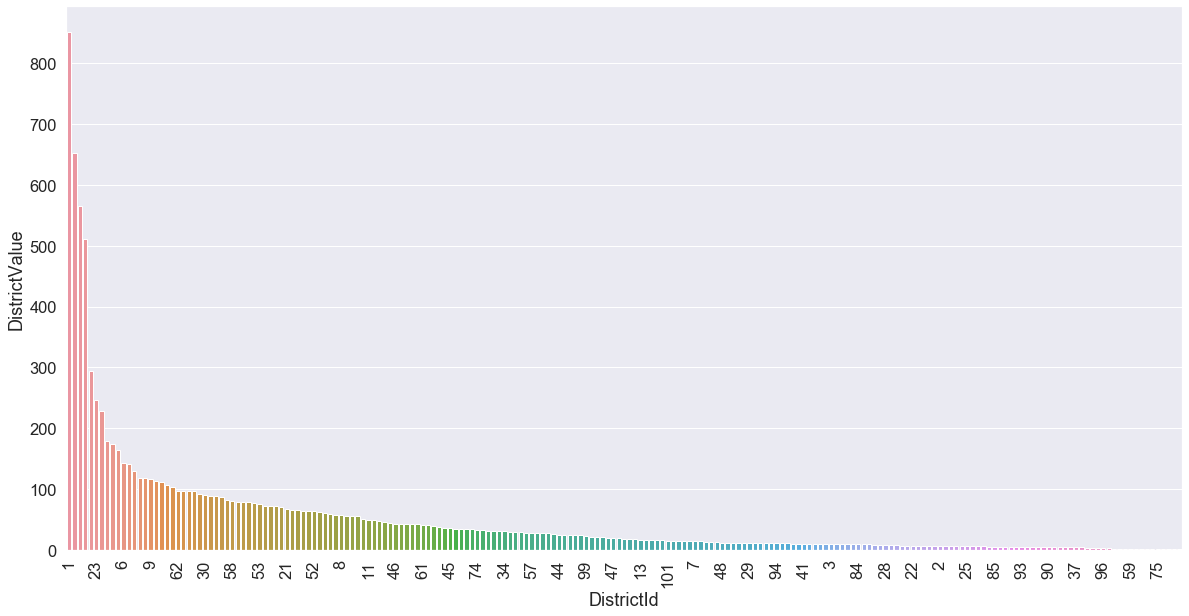

In [137]:
sns.set(style="darkgrid", font_scale=1.5)
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(y='DistrictValue', x='DistrictId', 
            data=district_value,
            order=district_value.sort_values(by='DistrictValue', ascending=False)['DistrictId']
           );
ax.tick_params(axis='x', rotation=90)
ax.xaxis.set_major_locator(plt.MaxNLocator(50))

In [139]:
popular_district = district_value.loc[district_value['DistrictValue'] > 200, 'DistrictId'].tolist()

In [140]:
popular_district

['27', '1', '23', '6', '9', '62', '30']

In [141]:
district_value.loc[~district_value['DistrictId'].isin(popular_district), 'DistrictId'] = 300
district_value = district_value.groupby('DistrictId')['DistrictValue'].agg(DistrictValue='median')
district_value.reset_index(level='DistrictId', inplace=True)

In [143]:
district_value.head()

,DistrictId,DistrictValue
0,300,17
1,1,652
2,23,565
3,27,851
4,30,228


In [144]:
train_df.loc[~train_df['DistrictId'].isin(popular_district), 'DistrictId'] = 300

Формирование признаков

In [145]:
train_df = train_df.merge(district_value, on='DistrictId', how='left').set_index(train_df.index)

In [147]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  object 
 1   Rooms          10000 non-null  int32  
 2   Square         10000 non-null  float64
 3   LifeSquare     10000 non-null  float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   10000 non-null  float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Pri

In [ ]:
# Стоимость квадратного метра в зависимости то района

In [148]:
train_df['PriceForSquare'] = train_df['Price'] / train_df['Square']

In [150]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DistrictId      10000 non-null  object 
 1   Rooms           10000 non-null  int32  
 2   Square          10000 non-null  float64
 3   LifeSquare      10000 non-null  float64
 4   KitchenSquare   10000 non-null  float64
 5   Floor           10000 non-null  int64  
 6   HouseFloor      10000 non-null  float64
 7   HouseYear       10000 non-null  int64  
 8   Ecology_1       10000 non-null  float64
 9   Ecology_2       10000 non-null  object 
 10  Ecology_3       10000 non-null  object 
 11  Social_1        10000 non-null  int64  
 12  Social_2        10000 non-null  int64  
 13  Social_3        10000 non-null  int64  
 14  Healthcare_1    10000 non-null  float64
 15  Helthcare_2     10000 non-null  int64  
 16  Shops_1         10000 non-null  int64  
 17  Shops_2         10000 non-nu

In [156]:
price_by_district = train_df.groupby(['DistrictId'], as_index=False).agg({'PriceForSquare':'median'}).rename(columns={'PriceForSquare':'PriceForSquareByDistrict'})

In [157]:
price_by_district.tail()

,DistrictId,PriceForSquareByDistrict
3,27,2759.086353
4,30,2830.364108
5,6,2860.945077
6,62,2613.223638
7,9,3206.588257


In [159]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DistrictId      10000 non-null  object 
 1   Rooms           10000 non-null  int32  
 2   Square          10000 non-null  float64
 3   LifeSquare      10000 non-null  float64
 4   KitchenSquare   10000 non-null  float64
 5   Floor           10000 non-null  int64  
 6   HouseFloor      10000 non-null  float64
 7   HouseYear       10000 non-null  int64  
 8   Ecology_1       10000 non-null  float64
 9   Ecology_2       10000 non-null  object 
 10  Ecology_3       10000 non-null  object 
 11  Social_1        10000 non-null  int64  
 12  Social_2        10000 non-null  int64  
 13  Social_3        10000 non-null  int64  
 14  Healthcare_1    10000 non-null  float64
 15  Helthcare_2     10000 non-null  int64  
 16  Shops_1         10000 non-null  int64  
 17  Shops_2         10000 non-nu

In [160]:
# Класс этажа

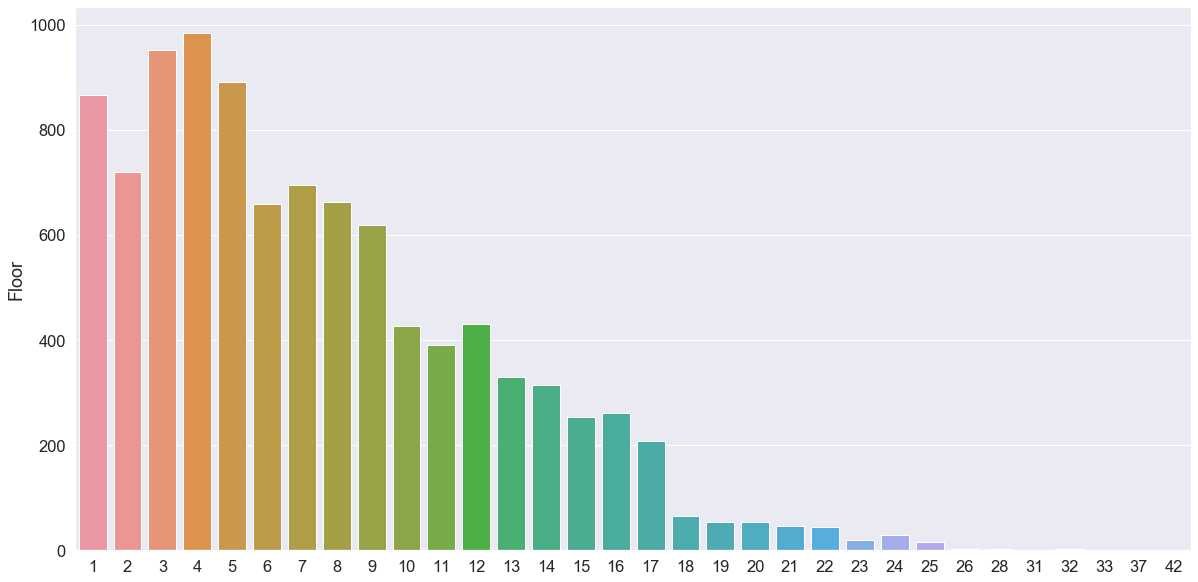

In [162]:
sns.set(style="darkgrid", font_scale=1.5)

f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(y=train_df['Floor'].value_counts(), x=train_df['Floor'].value_counts().index);

In [163]:
train_df.loc[train_df['Floor'] <= 4, 'Floor_cat'] = 1  
train_df.loc[(train_df['Floor'] > 4) & (train_df['Floor'] <= 12), 'Floor_cat'] = 2
train_df.loc[(train_df['Floor'] > 12) & (train_df['Floor'] <= 18), 'Floor_cat'] = 3
train_df.loc[train_df['Floor'] > 18, 'Floor_cat'] = 4

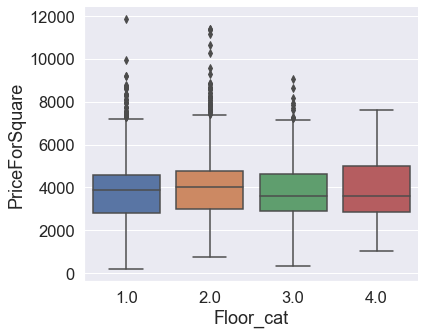

In [175]:
sns.catplot("Floor_cat", "PriceForSquare", kind="box", data=train_df, aspect=5/4);

In [176]:
# Класс этажности здания

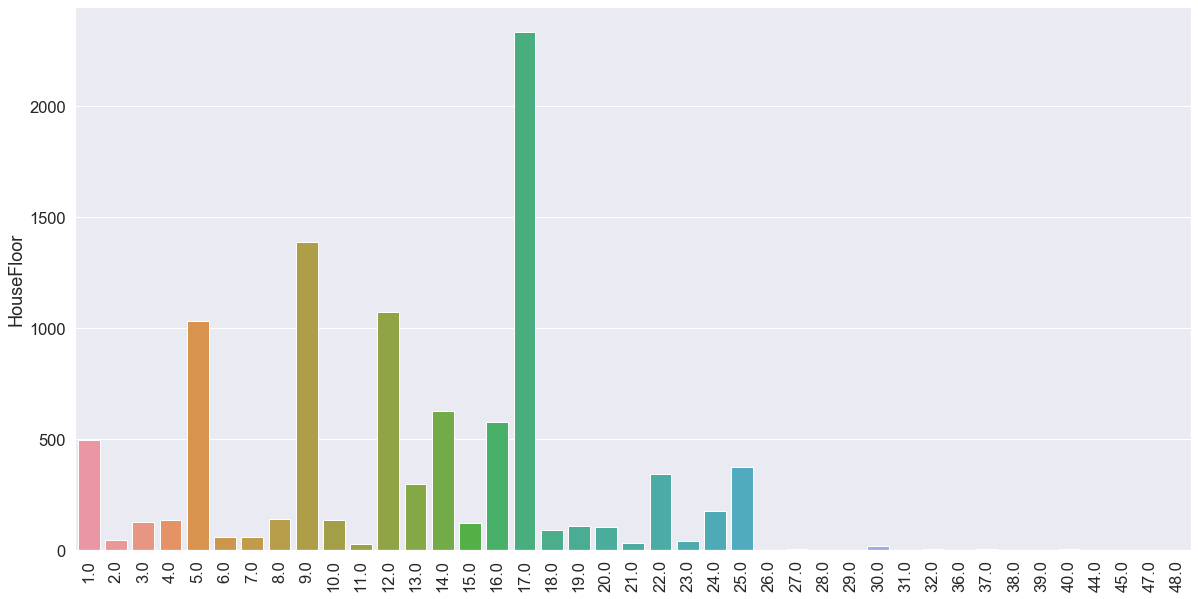

In [177]:
sns.set(style="darkgrid", font_scale=1.5)

f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(y=train_df['HouseFloor'].value_counts(), 
            x=train_df['HouseFloor'].value_counts().index,
           )
ax.tick_params(axis='x', rotation=90)

In [178]:
train_df['HouseFloor'].unique()

array([ 9., 12., 17.,  5., 13.,  8.,  4., 14., 25.,  1., 22., 16., 15.,
        3., 10., 11.,  7., 24., 28., 19., 20., 18., 23.,  2., 32., 40.,
       27., 21., 45., 30.,  6., 37., 48., 47., 44., 39., 36., 29., 38.,
       26., 31.])

In [179]:
train_df.loc[train_df['HouseFloor'] <= 5, 'HouseFloor_cat'] = 1  
train_df.loc[(train_df['HouseFloor'] > 5) & (train_df['HouseFloor'] <= 12), 'HouseFloor_cat'] = 2
train_df.loc[(train_df['HouseFloor'] > 12) & (train_df['HouseFloor'] <= 17), 'HouseFloor_cat'] = 3
train_df.loc[train_df['HouseFloor'] > 17, 'HouseFloor_cat'] = 4

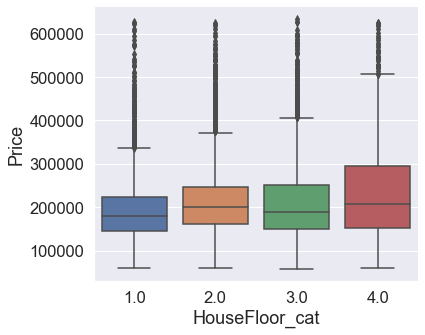

In [185]:
sns.catplot("HouseFloor_cat", "Price", kind="box", data=train_df, aspect=5/4);

In [186]:
# Класс квартиры в зависимости от этажности здания и расположения квартиры

In [187]:
train_df[['Floor_cat', 'HouseFloor_cat']] = train_df[['Floor_cat', 'HouseFloor_cat']].astype(int)

In [188]:
train_df['FloorClass'] = (train_df['HouseFloor_cat'].astype(str) + train_df['Floor_cat'].astype(str)).astype(int)

In [189]:
train_df['FloorClass'].value_counts()

32    2146
22    1857
11    1592
33    1030
21    1027
31     778
42     525
43     401
44     274
12     245
41     125
Name: FloorClass, dtype: int64

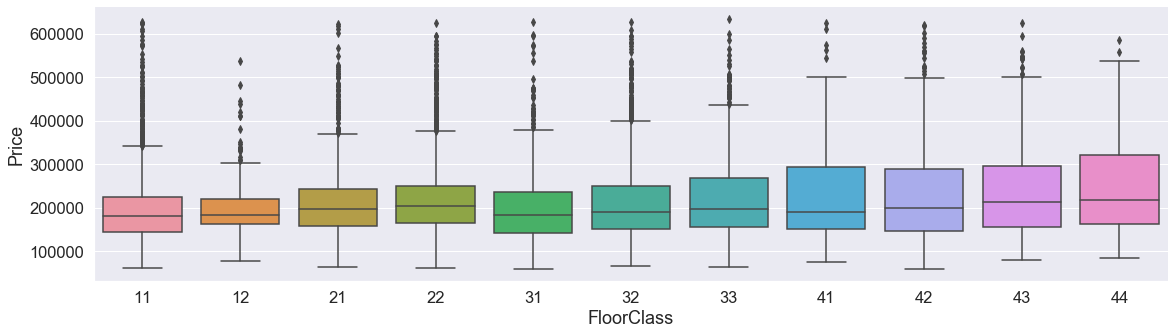

In [192]:
sns.catplot("FloorClass", "Price", kind="box", data=train_df, aspect=10/3);

In [193]:
# Стоимость квадратного метра в зависимости от класса этажности

In [194]:
price_by_floor_class = train_df.groupby(['FloorClass'], as_index=False).agg({'PriceForSquare':'median'}).rename(columns={'PriceForSquare':'PriceOneMeterByFloorClass'})

In [196]:
price_by_floor_class.tail()

,FloorClass,PriceOneMeterByFloorClass
6,33,3564.871800
7,41,3436.843345
8,42,3456.377441
9,43,3598.324107
10,44,3581.026978


In [197]:
train_df = train_df.merge(price_by_floor_class, on=['FloorClass'], how='left').set_index(train_df.index)

In [198]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DistrictId                 10000 non-null  object 
 1   Rooms                      10000 non-null  int32  
 2   Square                     10000 non-null  float64
 3   LifeSquare                 10000 non-null  float64
 4   KitchenSquare              10000 non-null  float64
 5   Floor                      10000 non-null  int64  
 6   HouseFloor                 10000 non-null  float64
 7   HouseYear                  10000 non-null  int64  
 8   Ecology_1                  10000 non-null  float64
 9   Ecology_2                  10000 non-null  object 
 10  Ecology_3                  10000 non-null  object 
 11  Social_1                   10000 non-null  int64  
 12  Social_2                   10000 non-null  int64  
 13  Social_3                   10000 non-null  

In [199]:
train_df.columns.tolist()

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'DistrictValue',
 'PriceForSquare',
 'Floor_cat',
 'HouseFloor_cat',
 'FloorClass',
 'PriceOneMeterByFloorClass']

Работа с test

In [200]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     3959 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Ecology_2      5000 non-null   object 
 10  Ecology_3      5000 non-null   object 
 11  Social_1       5000 non-null   int64  
 12  Social_2       5000 non-null   int64  
 13  Social_3       5000 non-null   int64  
 14  Healthcare_1   2623 non-null   float64
 15  Helthcare_2    5000 non-null   int64  
 16  Shops_1        5000 non-null   int64  
 17  Shops_2        5000 non-null   object 
dtypes: fl

In [201]:
test_df['DistrictId'] = test_df['DistrictId'].astype(str)

In [202]:
test_df.loc[test_df['Rooms'].isin([False]), 'Rooms'] = test_df['Rooms'].median()

In [204]:
test_df.loc[test_df['Square'] < 25, 'Square'] = test_df['Square'].median()

In [205]:
test_df['Square'].isnull().sum()

0

In [206]:
test_df['LifeSquare'].isnull().sum()

1041

In [207]:
test_df.loc[test_df['LifeSquare'] < 15, 'LifeSquare'] = test_df['LifeSquare'].median()

In [208]:
test_df[['LifeSquare','Square']].describe()

,LifeSquare,Square
count,3959.000000,5000.000000
mean,37.096012,56.635150
std,16.859368,18.859717
min,15.019807,25.244171
25%,23.962452,42.051262
50%,32.925087,52.923101
75%,45.174091,66.285129
max,303.071094,223.453689


In [209]:
test_df.loc[test_df['LifeSquare'].isnull(), 'LifeSquare'] = test_df['LifeSquare'].median()

In [210]:
test_df[['LifeSquare','Square']].describe()

,LifeSquare,Square
count,5000.000000,5000.000000
mean,36.227625,56.635150
std,15.096903,18.859717
min,15.019807,25.244171
25%,28.224810,42.051262
50%,32.925087,52.923101
75%,41.769526,66.285129
max,303.071094,223.453689


In [211]:
test_df.loc[(test_df['LifeSquare'] > test_df['Square']),'LifeSquare'] = test_df['LifeSquare'].median()

In [212]:
test_df.loc[test_df['KitchenSquare'] < 4, 'KitchenSquare'] = test_df['KitchenSquare'].median()

In [213]:
test_df[['KitchenSquare','Square']].describe()

,KitchenSquare,Square
count,5000.000000,5000.000000
mean,7.579600,56.635150
std,9.386505,18.859717
min,4.000000,25.244171
25%,6.000000,42.051262
50%,6.000000,52.923101
75%,9.000000,66.285129
max,620.000000,223.453689


In [214]:
test_df.loc[(train_df['KitchenSquare'] > 200) | (test_df['KitchenSquare'] > test_df['Square']),'KitchenSquare'] = test_df['KitchenSquare'].median()

In [215]:
test_df.loc[(test_df['HouseFloor'] == 0) | (test_df['HouseFloor'] > 49), 'HouseFloor'] = test_df['HouseFloor'].median()

In [216]:
floor_error_test = test_df[test_df['Floor'] > test_df['HouseFloor']]
floor_error_test

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
15856,74,2.0,69.263183,32.925087,6.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
15975,61,3.0,64.543658,42.651541,7.0,10,9.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B
5214,27,1.0,37.555197,32.925087,6.0,5,1.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
11160,58,1.0,48.610661,32.925087,6.0,4,3.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B
2982,6,2.0,63.460684,32.925087,6.0,13,12.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15181,27,4.0,104.664209,66.903563,6.0,4,1.0,2016,0.017647,B,B,2,469,0,NaN,0,0,B
16064,30,1.0,38.376234,37.003311,6.0,2,1.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B
2591,39,2.0,44.203592,30.191691,6.0,10,9.0,1972,0.428826,B,B,25,5011,8,730.0,0,2,B


In [218]:
floor_error_test = test_df.loc[test_df['Floor'] > test_df['HouseFloor']].index

In [219]:
test_df.loc[floor_error_test, 'Floor'] = test_df.loc[floor_error_test, 'HouseFloor'].apply(lambda x: random.randint(1, x))

In [220]:
floor_error_test

Int64Index([15856, 15975,  5214, 11160,  2982,  2449,  9348, 12749, 12309,
             5452,
            ...
             7639, 16722,  9157,  5820, 16087, 15181, 16064,  2591, 14562,
             5783],
           dtype='int64', name='Id', length=793)

In [224]:
test_df['HouseYear'].sort_values().unique()

array([1908, 1909, 1910, 1911, 1912, 1914, 1917, 1918, 1920, 1926, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1937, 1938, 1939,
       1940, 1941, 1943, 1948, 1949, 1950, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [225]:
test_df.isnull().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare          0
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

In [226]:
test_df.loc[test_df['Healthcare_1'].isnull(), 'Healthcare_1'] = test_df['Healthcare_1'].median()

In [227]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   object 
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     5000 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Ecology_2      5000 non-null   object 
 10  Ecology_3      5000 non-null   object 
 11  Social_1       5000 non-null   int64  
 12  Social_2       5000 non-null   int64  
 13  Social_3       5000 non-null   int64  
 14  Healthcare_1   5000 non-null   float64
 15  Helthcare_2    5000 non-null   int64  
 16  Shops_1        5000 non-null   int64  
 17  Shops_2        5000 non-null   object 
dtypes: fl

In [228]:
test_df.loc[~test_df['DistrictId'].isin(popular_district), 'DistrictId'] = 300

In [229]:
test_df = test_df.merge(district_value, on='DistrictId', how='left').set_index(test_df.index)

In [230]:
test_df = test_df.merge(price_by_district, on=['DistrictId'], how='left').set_index(test_df.index)

In [232]:
test_df.loc[test_df['Floor'] <= 4, 'Floor_cat'] = 1  
test_df.loc[(test_df['Floor'] > 4) & (test_df['Floor'] <= 12), 'Floor_cat'] = 2
test_df.loc[(test_df['Floor'] > 12) & (test_df['Floor'] <= 18), 'Floor_cat'] = 3
test_df.loc[test_df['Floor'] > 18, 'Floor_cat'] = 4

In [233]:
test_df.loc[test_df['HouseFloor'] <= 5, 'HouseFloor_cat'] = 1  
test_df.loc[(test_df['HouseFloor'] > 5) & (test_df['HouseFloor'] <= 12), 'HouseFloor_cat'] = 2
test_df.loc[(test_df['HouseFloor'] > 12) & (test_df['HouseFloor'] <= 17), 'HouseFloor_cat'] = 3
test_df.loc[test_df['HouseFloor'] > 17, 'HouseFloor_cat'] = 4

In [234]:
test_df[['Floor_cat', 'HouseFloor_cat']] = test_df[['Floor_cat', 'HouseFloor_cat']].astype(int)

In [235]:
test_df['FloorClass'] = (test_df['HouseFloor_cat'].astype(str) + test_df['Floor_cat'].astype(str)).astype(int)

In [252]:
test_df = test_df.merge(price_by_floor_class, on=['FloorClass'], how='left').set_index(test_df.index)

Выбор необходимых признаков


In [240]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DistrictId                   5000 non-null   object 
 1   Rooms                        5000 non-null   float64
 2   Square                       5000 non-null   float64
 3   LifeSquare                   5000 non-null   float64
 4   KitchenSquare                5000 non-null   float64
 5   Floor                        5000 non-null   int64  
 6   HouseFloor                   5000 non-null   float64
 7   HouseYear                    5000 non-null   int64  
 8   Ecology_1                    5000 non-null   float64
 9   Ecology_2                    5000 non-null   object 
 10  Ecology_3                    5000 non-null   object 
 11  Social_1                     5000 non-null   int64  
 12  Social_2                     5000 non-null   int64  
 13  Social_3       

In [241]:
train_df.columns.tolist()

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'DistrictValue',
 'PriceForSquare',
 'Floor_cat',
 'HouseFloor_cat',
 'FloorClass',
 'PriceOneMeterByFloorClass']

In [242]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Social_1', 'Social_2', 'Social_3','Helthcare_2', 'Shops_1', 'DistrictValue','Floor_cat', 'HouseFloor_cat', 'PriceOneMeterByFloorClass']

In [243]:
target_name = 'Price'

Разбиение на train и val

In [244]:
X = train_df[feature_names]
y = train_df[target_name]

In [247]:
test_df.columns.tolist()

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'DistrictValue',
 'PriceForSquareByDistrict',
 'Floor_cat',
 'HouseFloor_cat',
 'FloorClass',
 'PriceOneMeterByFloorClass_x',
 'PriceOneMeterByFloorClass_y']

In [253]:
X_test = test_df[feature_names]

In [256]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=21)

In [257]:
X_train.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,DistrictValue,Floor_cat,HouseFloor_cat,PriceOneMeterByFloorClass
Id,,,,,,,,,,,,,,,,,
6225,1,39.837741,23.281368,7.0,13,17.0,2010,0.007659,35,7077,56,3,19,17,3,3,3564.871800
12927,2,52.513310,32.781260,6.0,4,20.0,1977,0.072158,2,629,1,0,0,247,1,4,3436.843345
13125,1,44.846563,21.589865,8.0,3,14.0,2004,0.000000,36,6714,2,0,2,17,1,3,3384.396694
12282,2,52.449858,27.145808,7.0,3,5.0,1953,0.169091,19,3856,10,2,5,17,1,1,3718.040233
1214,3,65.521543,39.973740,8.0,5,9.0,1976,0.169091,19,3856,10,2,5,17,2,2,4331.208504


In [259]:
X_train.shape

(7000, 17)

In [260]:
rf_model = RandomForestRegressor(max_depth=15, max_features=5, n_estimators=10, random_state=42)

In [261]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [262]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_val)

Train R2:	0.927
Valid R2:	0.687


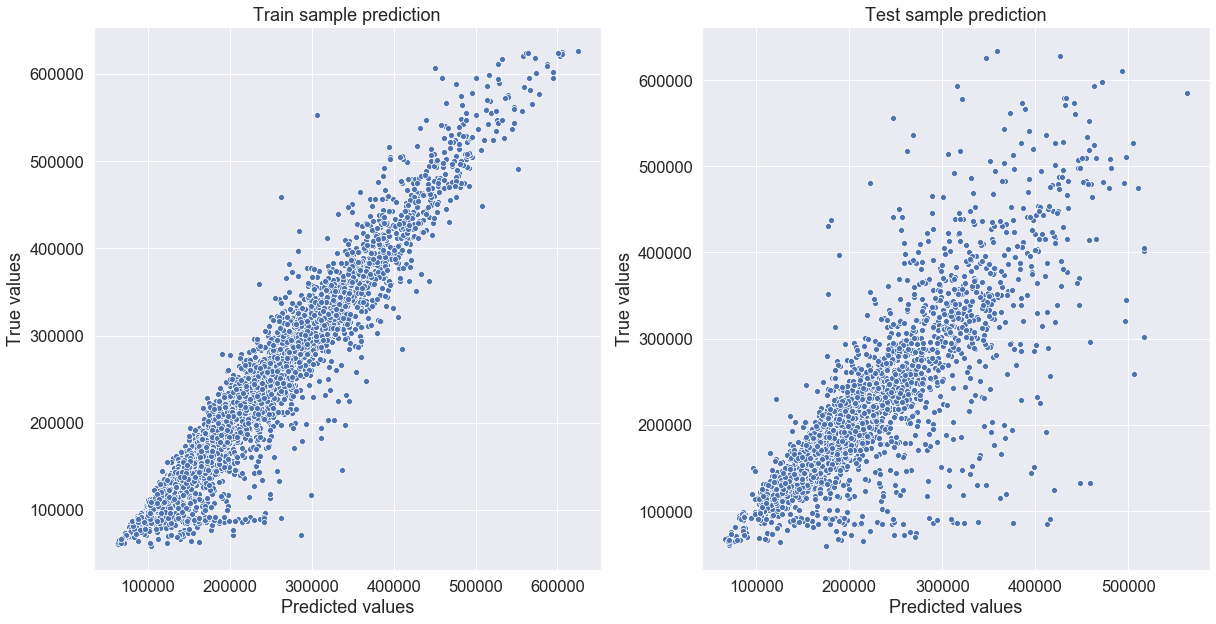

In [265]:
evaluate_preds(y_train, y_train_preds, y_val, y_test_preds)

Перекрестная проверка:

In [266]:
cv_score = cross_val_score(rf_model, X, y, scoring='r2', cv=KFold(n_splits=5, shuffle=True, random_state=21))
cv_score

array([0.72153799, 0.69160035, 0.7272253 , 0.72468658, 0.71182335])

In [267]:
cv_score.mean()

0.7153747140628232

Определение важности признаков

In [270]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
1,Square,0.252443
0,Rooms,0.133846
2,LifeSquare,0.100716
10,Social_3,0.080826
8,Social_1,0.066491
9,Social_2,0.064541
13,DistrictValue,0.058494
6,HouseYear,0.042978
7,Ecology_1,0.041608
3,KitchenSquare,0.040455


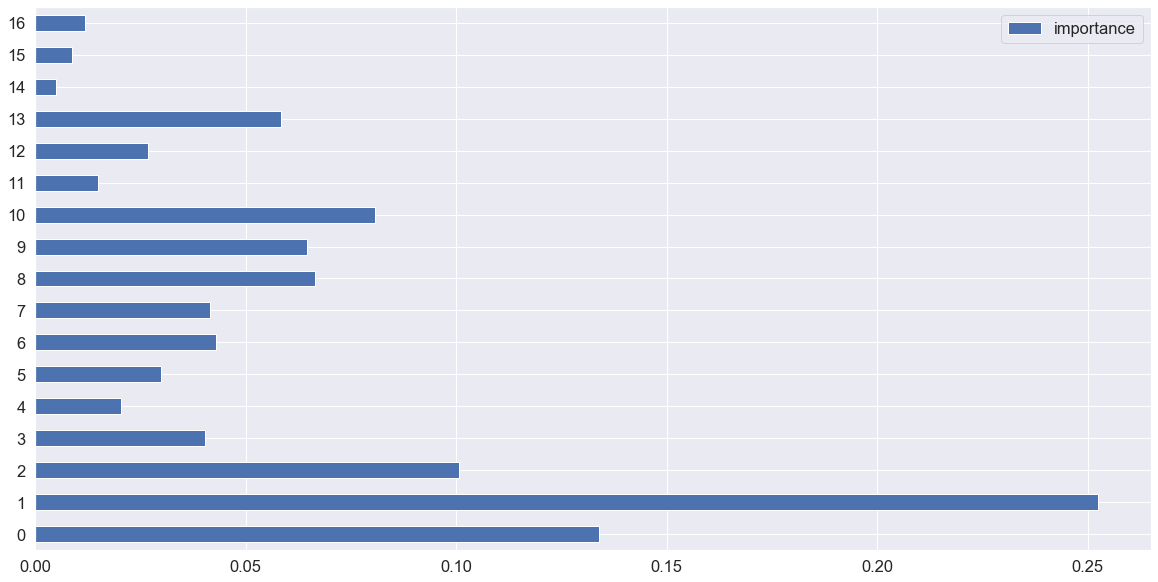

In [271]:
feature_importances.plot(kind='barh', figsize=(20, 10));

Прогнозирование

In [272]:
y_pred = rf_model.predict(X_test)

preds = pd.DataFrame()
preds['Id'] = X_test.index
preds['Price'] = y_pred

In [275]:
preds.tail()

,Id,Price
4995,8180,244117.742347
4996,4695,115827.733423
4997,5783,307158.148067
4998,4780,193805.254573
4999,12504,177301.360440


In [276]:
preds.to_csv('VEDorkin_predictions.csv', index=False)